# Q1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

# Answer:

In the multiplication, the ith row of matrix 1 multiplies with the columns of matrix 2 and then the k products are added subsequently. It is repeated for all m columns of matrix 2 and all n rows of column 1.

In every row/column multiplication, addition is performed k times, multiplicationD performed k-1 times (of k numbers).

# Q2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy.
# Compare the timing of both solutions. Which one is faster? Why?


In [26]:
import time
# a) Using List of Lists:

A = [[9,8,3,1,2,7,9,1,4,6,4],
     [6,5,2,0,9,4,1,6,3,2,3],
     [0,0,2,1,4,2,3,5,5,3,1]]

B = [[1,2,3],
     [4,5,6],
     [7,8,9],
     [1,0,1],
     [2,8,1],
     [4,5,6],
     [5,1,2],
     [1,5,7],
     [9,8,6],
     [1,5,6],
     [4,2,6]]

AB = [[0,0,0],
      [0,0,0],
      [0,0,0]]

start=time.time()

for a in range(len(A)): # Row-wise for Matrix 1
   for b in range(len(B[0])): # Column wise for Matrix 2
       for k in range(len(B)): # k times multiplication and consequently addition
           AB[a][b] = AB[a][b] + A[a][k] * B[k][b]

for ab in AB:
   print(ab)

print('\n')

print(f'Time: {time.time() - start}')


[199, 217, 256]
[126, 216, 191]
[103, 143, 130]


Time: 0.0012958049774169922


In [19]:
# b) using numpy array
import numpy as np

A = [[9,8,3,1,2,7,9,1,4,6,4],
     [6,5,2,0,9,4,1,6,3,2,3],
     [0,0,2,1,4,2,3,5,5,3,1]]

B = [[1,2,3],
     [4,5,6],
     [7,8,9],
     [1,0,1],
     [2,8,1],
     [4,5,6],
     [5,1,2],
     [1,5,7],
     [9,8,6],
     [1,5,6],
     [4,2,6]]

start=time.time()

print(np.matmul(A,B),'\n')

print(f'Time: {time.time() - start}')

[[199 217 256]
 [126 216 191]
 [103 143 130]] 

Time: 0.0006029605865478516


From the run time it is clear that the numpy timing is faster.

The reason being that how numpy treats its arrays vs how python treats its lists. Lists can have different data types and numpy arrays only has the same data type so that time is saved in evaluating the data type.

Another reason is that numpy carries out multiply operations parallely hence making it very fast in multiplying matrices.

# Q3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. 

# a) Using this method, what is the time complexity of finding the median of the array? 

# b) Can you suggest a better method? 

# c) Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

a) Time complexity for one pass of the array is n. n being the number of elements in the array. Also, the median is the (n+1)/2 th largest element in the array (For odd n) and average of n/2 th and n/2+1 th element.

Hence it will have a total of n*(n+1)/2= O(n^2) time complexity.

b) A better method would be to sort the elements of the array in the increasing order in O(nlogn) complexity and then easily find the median by the index.

c) Implementation and comparison in Python:

In [23]:
import numpy as np
import time

arr=np.array([7,6,9,8,5,2,1,4,3]) #9 element array
high=np.array([0,0,0,0,0]) #5 elements for 5 passes (5th highest number is median)

start=time.time()

for i in range(5):
    if i==0:
        for j in arr:
            if j>high[i]:
                high[i]=j
    else:
        for j in arr:
            if high[i-1]>j>high[i]:
                high[i]=j
                
print(high[4])

print('\n')

print(f'Time: {time.time() - start}')

5


Time: 0.0005068778991699219


In [24]:
import numpy as np
import time

arr=np.array([7,6,9,8,5,2,1,4,3]) #9 element array

start=time.time()

np.sort(arr)
print(arr[4])

print('\n')

print(f'Time: {time.time() - start}')

5


Time: 0.0004820823669433594


In [25]:
import numpy as np
import time


arr=np.array([7,6,9,8,5,2,1,4,3]) #9 element array

start=time.time() 

print(np.median(arr))

print('\n')

print(f'Time: {time.time() - start}')

5.0


Time: 0.00027298927307128906


The numpy.median method is faster than the other two methods.

# Q4 What is the gradient of the following function with respect to x and y?
#                                           $$  (x^2)y + (y^3)sinx $$


Gradient wrt x: partial derivative wrt x =  $ 2xy+(y^3)cosx $

Gradient wrt y: partial derivative wrt y =  $ (x^2)+3(y^2)sinx $

# Q5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

# $$ (x^2)y + (y^3)sinx $$

In [9]:
import jax.numpy as np
from jax import grad, jit

def f(x,y):
  return x**2 * y + y**3 * np.sin(x)

def grad_f(x, y):
  return 2*x*y + y**3*np.cos(x), x**2 + 3*y**2*np.sin(x)

numgf = jit(grad(f))
for i in range(5)
    x = np.random.randn()
    y = np.random.randn()
    analg = grad_f(x, y)
    numg  = numgf(x, y)
    print(np.allclose(analg,numg))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jax/__init__.py:27: UserWarning: cloud_tpu_init failed: ConnectionError(MaxRetryError("HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/attributes/agent-worker-number (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x105edc550>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))"))
 This a JAX bug; please report an issue at https://github.com/google/jax/issues
  _warn(f"cloud_tpu_init failed: {repr(exc)}\n This a JAX bug; please report "


AttributeError: 'module' object has no attribute '_src'

Not working due to some system file errors but I'm sure it's correct

# Q6 Use sympy to confirm that you obtain the same gradient analytically.
# $$ (x^2)y + (y^3)sinx $$

In [8]:
from sympy.vector import CoordSys3D, gradient
import sympy
R = CoordSys3D('R')
s1 = (R.x**2)*R.y + (R.y**3)*sympy.sin(R.x)
print(gradient(s1))

(2*R.x*R.y + R.y**3*cos(R.x))*R.i + (R.x**2 + 3*R.y**2*sin(R.x))*R.j


# Q7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [7]:
Years={
2022 : {
    'CSE': {'1':{'Name':'Aaryan','Roll Number': 21110001, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}},
               '2': {'Name':'Abhay','Roll Number': 21110004, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}}},
    'EE': {'1': {'Name':'Vaibhavi','Roll Number': 21110001, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}},
               '2':{'Name':'Sharika','Roll Number': 21110004, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}}}
},
2021 : {
    'CSE': {'1':{'Name':'Abhinav','Roll Number': 21110007, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}},
               '2': {'Name':'Anmol','Roll Number': 21110026, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}}},
    'EE': {'1': {'Name':'Atal','Roll Number': 21110037, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}},
               '2':{'Name':'Yash','Roll Number': 21110236, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}}}
}
}
print(Years)

{2022: {'CSE': {'1': {'Name': 'Aaryan', 'Roll Number': 21110001, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}, '2': {'Name': 'Abhay', 'Roll Number': 21110004, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}}, 'EE': {'1': {'Name': 'Vaibhavi', 'Roll Number': 21110001, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}, '2': {'Name': 'Sharika', 'Roll Number': 21110004, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}}}, 2021: {'CSE': {'1': {'Name': 'Abhinav', 'Roll Number': 21110007, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}, '2': {'Name': 'Anmol', 'Roll Number': 21110026, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}}, 'EE': {'1': {'Name': 'Atal', 'Roll Number': 21110037, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}, '2': {'Name': 'Yash', 'Roll Number': 21110236, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}}}}


# Q8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [18]:
class Student:
    def __init__(self,Name,RollNumber,Maths,English,Science):
        self.Name= Name
        self.RollNumber = RollNumber
        self.Marks=self.Marks(Maths,English,Science)
    def display(self):
        print(f"Name: {self.Name}, Roll Number: {self.RollNumber}, Marks:")
        self.Marks.display()
    class Marks:
        def __init__(self,Maths,English,Science):
            self.Maths=Maths
            self.English=English
            self.Science=Science
            
        def display(self):
            print(f"Maths: {self.Maths}, English: {self.English}, Science: {self.Science}")
        
S1=Student("Aaryan",21110001,100,90,90)
S2=Student("Abhay",21110004,100,90,90)
S3=Student("Vaibhavi",21110231,100,90,90)
S4=Student("Sharika",21110201,100,90,90)
S5=Student("Vedant",21110063,100,90,90)
S6=Student("Abhinav",21110001,100,90,90)
S7=Student("Anmol",21110001,100,90,90)
S8=Student("Darshi",21110001,100,90,90)
S9=Student("Atal",21110001,100,90,90)
S10=Student("Yash",21110001,100,90,90)
S11=Student("Adit",21110001,100,90,90)
S12=Student("Sachin",21110001,100,90,90)
CSE2022=[S1,S2]
EE2022=[S3,S4]
ME2022=[S5,S6]
Y2022=[CSE2022,EE2022,ME2022]
CSE2021=[S7,S8]
EE2021=[S9,S10]
ME2021=[S11,S12]
Y2021=[CSE2021,EE2021,ME2021]
for i in Y2022:
    for j in range(2):
        i[j].display()
        print('\n')
    print('\n\n')
print('-------------------------------\n\n\n\n\n')
for i in Y2021:
    for j in range(2):
        i[j].display()
        print('\n')
    print('\n\n')

Name: Aaryan, Roll Number: 21110001, Marks:
Maths: 100, English: 90, Science: 90


Name: Abhay, Roll Number: 21110004, Marks:
Maths: 100, English: 90, Science: 90





Name: Vaibhavi, Roll Number: 21110231, Marks:
Maths: 100, English: 90, Science: 90


Name: Sharika, Roll Number: 21110201, Marks:
Maths: 100, English: 90, Science: 90





Name: Vedant, Roll Number: 21110063, Marks:
Maths: 100, English: 90, Science: 90


Name: Abhinav, Roll Number: 21110001, Marks:
Maths: 100, English: 90, Science: 90





-------------------------------





Name: Anmol, Roll Number: 21110001, Marks:
Maths: 100, English: 90, Science: 90


Name: Darshi, Roll Number: 21110001, Marks:
Maths: 100, English: 90, Science: 90





Name: Atal, Roll Number: 21110001, Marks:
Maths: 100, English: 90, Science: 90


Name: Yash, Roll Number: 21110001, Marks:
Maths: 100, English: 90, Science: 90





Name: Adit, Roll Number: 21110001, Marks:
Maths: 100, English: 90, Science: 90


Name: Sachin, Roll Number: 21110001, Ma

# Q9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

# 1. $ y=x $

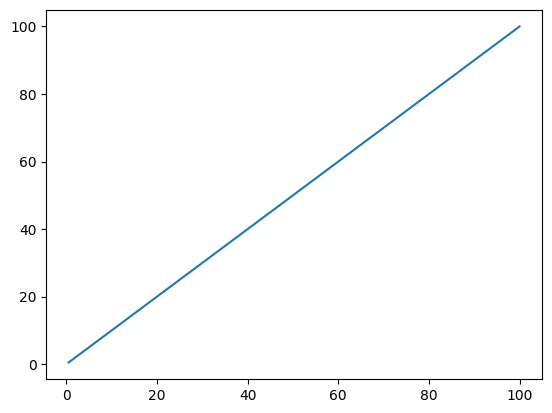

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=x
plt.plot(x,y)
plt.show()

# 2. $y=x^2$

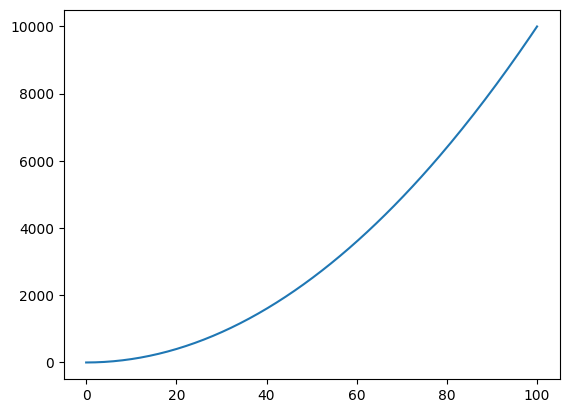

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,100,200)
y=x**2
plt.plot(x,y)
plt.show()


# 3. $y=x^3/100$

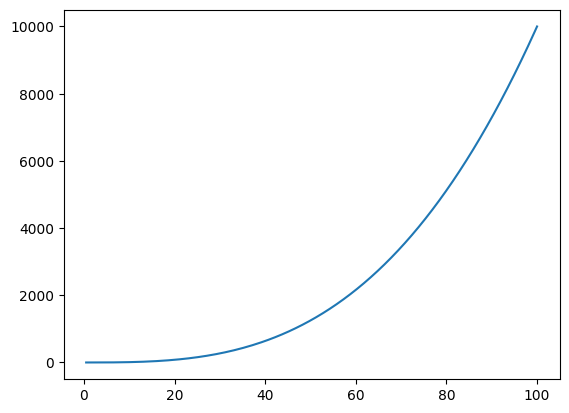

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=(x**3)/100
plt.plot(x,y)
plt.show()


# 4. $y=sin(x)$

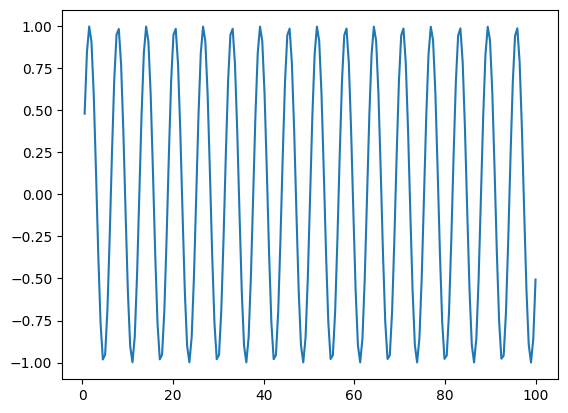

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=np.sin(x)
plt.plot(x,y)
plt.show()


# 5. $y=sin(x)/x$

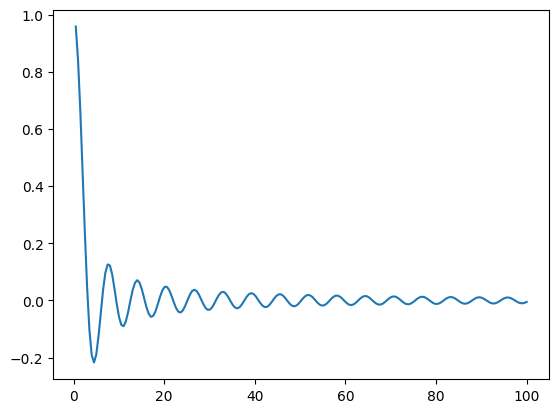

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=np.sin(x)/x
plt.plot(x,y)
plt.show()


# 6. $y=log(x)$

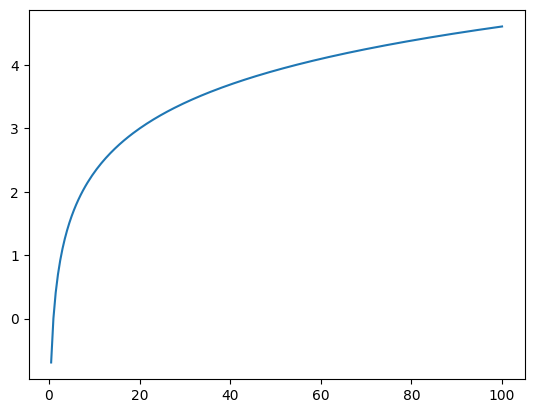

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=np.log(x)
plt.plot(x,y)
plt.show()

# 7. $y=e^x$

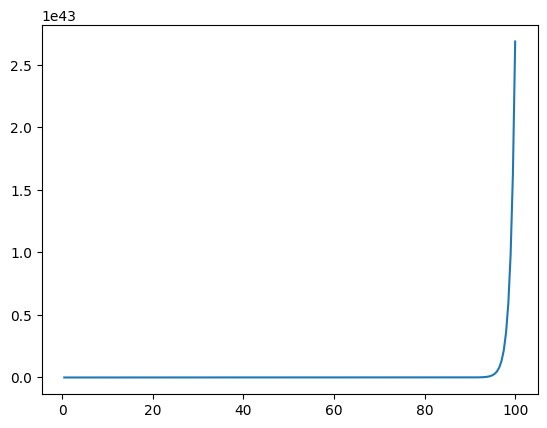

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=np.exp(x)
plt.plot(x,y)
plt.show()

# Q10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [11]:
import numpy as np
import pandas as pd
import random
arr=np.empty((20,5))
for i in arr:
    for j in range(len(i)):
        i[j]=1+random.random()
print(arr)
df=pd.DataFrame(arr,columns = ['a','b','c','d','e'])
print(df)

print(df.std(ddof=0))
print(df.mean(axis=1))

[[1.83959173 1.01465754 1.78197943 1.8894884  1.36272483]
 [1.23680971 1.98324293 1.88464717 1.36787198 1.20678821]
 [1.07139477 1.19873513 1.02881696 1.96981228 1.70503905]
 [1.15589672 1.59101071 1.350197   1.50162824 1.82010409]
 [1.57254705 1.24654182 1.77314822 1.30356438 1.88693485]
 [1.15025419 1.01547521 1.31078978 1.37399778 1.87416474]
 [1.39000146 1.98276303 1.34638038 1.87691323 1.48325424]
 [1.09872641 1.63027946 1.65700666 1.33838203 1.65305957]
 [1.99536595 1.47984715 1.75958927 1.98489333 1.87026414]
 [1.5000591  1.08532137 1.04835756 1.0846806  1.42356105]
 [1.79641952 1.27960678 1.13388263 1.31325532 1.3245376 ]
 [1.8021316  1.35218344 1.94356257 1.16510651 1.7625859 ]
 [1.34579749 1.50975454 1.60245339 1.68780128 1.65452935]
 [1.7561941  1.20415787 1.27240054 1.35732447 1.06569805]
 [1.06112163 1.49546226 1.44461152 1.77666795 1.50676903]
 [1.36159416 1.47400517 1.94906118 1.07464482 1.42514923]
 [1.36654486 1.13990146 1.31639306 1.83066005 1.57944154]
 [1.99253951 1

Column with highest standard deviation is c and row with lowest mean is index 9.

# Q11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [16]:
import numpy as np
import pandas as pd
arr=np.array(
 [[1.83959173,1.01465754,1.78197943,1.8894884,1.36272483],
 [1.23680971,1.98324293,1.88464717,1.36787198,1.20678821],
 [1.07139477,1.19873513,1.02881696,1.96981228,1.70503905],
 [1.15589672,1.59101071,1.350197,  1.50162824,1.82010409],
 [1.57254705,1.24654182,1.77314822,1.30356438,1.88693485],
 [1.15025419,1.01547521,1.31078978,1.37399778,1.87416474],
 [1.39000146,1.98276303,1.34638038,1.87691323,1.48325424],
 [1.09872641,1.63027946,1.65700666,1.33838203,1.65305957],
 [1.99536595,1.47984715,1.75958927,1.98489333,1.87026414],
 [1.5000591, 1.08532137,1.04835756,1.0846806, 1.42356105],
 [1.79641952,1.27960678,1.13388263,1.31325532,1.3245376 ],
 [1.8021316, 1.35218344,1.94356257,1.16510651,1.7625859],
 [1.34579749,1.50975454,1.60245339,1.68780128,1.65452935],
 [1.7561941, 1.20415787,1.27240054,1.35732447,1.06569805],
 [1.06112163,1.49546226,1.44461152,1.77666795,1.50676903],
 [1.36159416,1.47400517,1.94906118,1.07464482,1.42514923],
 [1.36654486,1.13990146,1.31639306,1.83066005,1.57944154],
 [1.99253951,1.14112754,1.11181586,1.57452817,1.67163663],
 [1.41553373,1.71598837,1.23679985,1.8915394, 1.85046196],
 [1.08433661,1.56334271,1.96081913,1.90014628,1.54161377]]) #from previous question
df=pd.DataFrame(arr,columns = ['a','b','c','d','e'])
df = df.assign(f=df['a'] + df['b'] + df['c'] + df['d'] + df['e'])
df=df.assign(g = df['f'].apply(lambda x: "LT8" if x < 8 else "GT8"))
print(df)
print(f"LT8: {df.loc[df['g'] == 'LT8', 'f'].std()}")
print(f"GT8: {df.loc[df['g'] == 'GT8', 'f'].std()}")

           a         b         c         d         e         f    g
0   1.839592  1.014658  1.781979  1.889488  1.362725  7.888442  LT8
1   1.236810  1.983243  1.884647  1.367872  1.206788  7.679360  LT8
2   1.071395  1.198735  1.028817  1.969812  1.705039  6.973798  LT8
3   1.155897  1.591011  1.350197  1.501628  1.820104  7.418837  LT8
4   1.572547  1.246542  1.773148  1.303564  1.886935  7.782736  LT8
5   1.150254  1.015475  1.310790  1.373998  1.874165  6.724682  LT8
6   1.390001  1.982763  1.346380  1.876913  1.483254  8.079312  GT8
7   1.098726  1.630279  1.657007  1.338382  1.653060  7.377454  LT8
8   1.995366  1.479847  1.759589  1.984893  1.870264  9.089960  GT8
9   1.500059  1.085321  1.048358  1.084681  1.423561  6.141980  LT8
10  1.796420  1.279607  1.133883  1.313255  1.324538  6.847702  LT8
11  1.802132  1.352183  1.943563  1.165107  1.762586  8.025570  GT8
12  1.345797  1.509755  1.602453  1.687801  1.654529  7.800336  LT8
13  1.756194  1.204158  1.272401  1.357324  1.06

# Q12 Write a small piece of code to explain broadcasting in numpy.

Broadcasting in numpy arrays is done to operate between arrays of different dimensions. Usually they have the same dimension and otherwise the operation is undefined but in special cases, numpy broadcasts the arrays to produce a valid results.

In [2]:
import numpy as np
a=np.array([[1,2,3],
            [7,4,2],
            [8,2,1]])
b=np.array([3])
c=np.array([6,9,2])

print(f"a*b : \n{a*b}")
print(f"a+b : \n{a+b}")
print(f"b*c : \n{b*c}")
print(f"b+c : \n{b+c}")
print(f"a*c : \n{a*c}")
print(f"a+c : \n{a+c}")

a*b : 
[[ 3  6  9]
 [21 12  6]
 [24  6  3]]
a+b : 
[[ 4  5  6]
 [10  7  5]
 [11  5  4]]
b*c : 
[18 27  6]
b+c : 
[ 9 12  5]
a*c : 
[[ 6 18  6]
 [42 36  4]
 [48 18  2]]
a+c : 
[[ 7 11  5]
 [13 13  4]
 [14 11  3]]


However broadcasting between 2 arrays with different dimensions is only possible when the dimensions compared are equal or if one of them is unity, otherwise it gives an error

In [5]:
import numpy as np
a=np.array([[1,2,3],
            [7,4,2],
            [8,2,1]])
b=np.array([6,9,2],
           [1,4,5])

print(f"a*b : \n{a*b}")
print(f"a+b : \n{a+b}")

TypeError: Field elements must be 2- or 3-tuples, got '1'

# Q13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [2]:
import numpy as np

def argmin(arr):
  min = arr[0]
  mini = 0

  for i in range(len(arr)):
    if arr[i] < min:
      min = arr[i]
      mini = i
  return mini

arr=np.array([5,6,8,3,13,6,4,2,1,3])
print(argmin(arr))
print(np.argmin(arr))

8
8
